In [1]:
import numpy as np, healpy as hp, curvedsky as cs, sys, plottools as pl, local, tools_cmb, tools_lens, quad_func, pickle, binning as bn
from pixell import enmap
from matplotlib.pyplot import *

In [2]:
def kkplot(mask,Klmin,klmin,mb):
    Klm = cs.utils.mulwin( Klmin, mask )
    klm = cs.utils.mulwin( klmin, mask )
    Kl = cs.utils.alm2cl(2048,Klm)
    kl = cs.utils.alm2cl(2048,klm)
    bK = bn.binning1(Kl,mb)
    bk = bn.binning1(kl,mb)
    plot(mb.bc,bk/bK)
    axhline(1,color='k',ls='--')

In [230]:
dirs = local.data_directory()
aobj = local.init_analysis_params(qid='diff_boss_03',ascale=3.,wtype='iso15v3PT')
#aobj = local.init_analysis_params(qid='diff_dn',ascale=3.,wtype='com16v3pt')
#aobj = local.init_analysis_params(qid='diff_dn',ascale=3.,wtype='com15v3pt')
#qobj = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'],bhe=['src'])
qobj = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'])
#al = (np.loadtxt(qobj.f['TT'].al)).T[1]

/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you

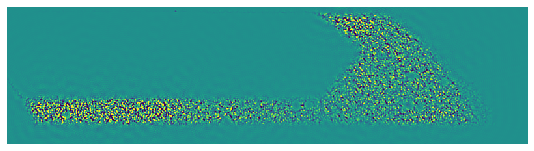

In [231]:
Klm = pickle.load(open(qobj.f['TT'].alm[0],"rb"))[0]
local.show_kmap(Klm,lonra=[145,240],latra=[-5,20],v=2e-9)

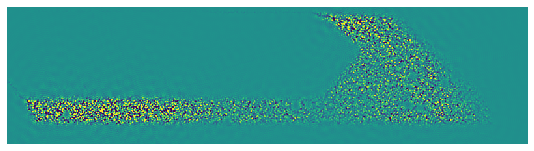

In [232]:
klm = pickle.load(open(qobj.f['TT'].alm[1],"rb"))[0]
local.show_kmap(klm,lonra=[145,240],latra=[-5,20],v=2e-9)

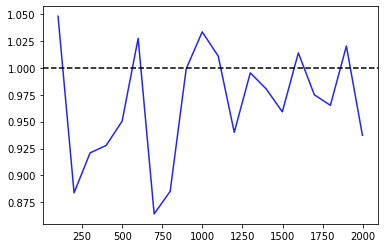

In [233]:
mb = bn.multipole_binning(20,lmin=50,lmax=2048)
Kl = cs.utils.alm2cl(2048,Klm)
kl = cs.utils.alm2cl(2048,klm)
bK = bn.binning1(Kl,mb)
bk = bn.binning1(kl,mb)
plot(mb.bc,bk/bK)
axhline(1,color='k',ls='--')

In [170]:
aobj = local.init_analysis_params(qid='diff_dn',ascale=3.,wtype='iso15v3')
ivar = tools_cmb.load_window_curvedsky(aobj)

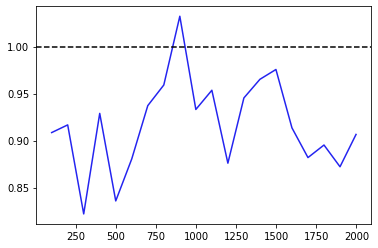

In [171]:
kkplot(ivar,Klm,klm,mb)

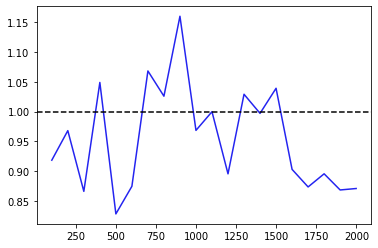

In [172]:
kkplot(ivar**3,Klm,klm,mb)

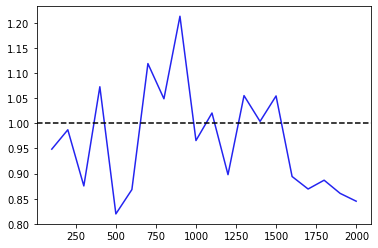

In [173]:
kkplot(ivar**5,Klm,klm,mb)

In [207]:
Ivar = ivar/np.mean(ivar)

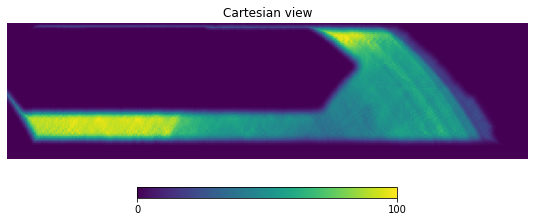

In [188]:
hp.cartview(Ivar,min=0,max=100,lonra=[145,240],latra=[-5,20])

/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you

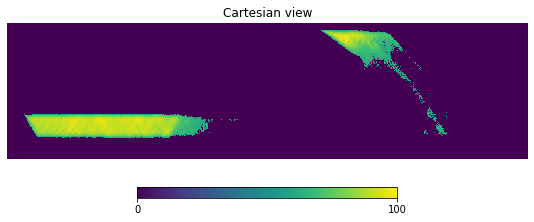

In [214]:
Ivar[Ivar<60.] = 0.
hp.cartview(Ivar,min=0,max=100,lonra=[145,240],latra=[-5,20])

In [215]:
fsky = Ivar.copy()
fsky[fsky!=0.] = 1.
print(np.mean(fsky))

0.00460280974706014


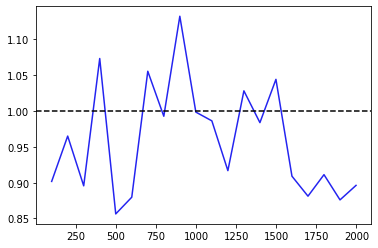

In [216]:
kkplot(Ivar,Klm,klm,mb)

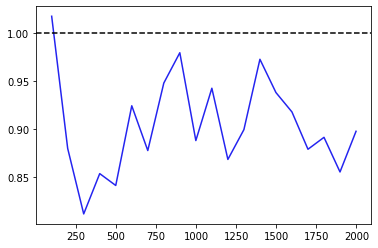

In [194]:
#mask1 = tools_cmb.create_mask(1024,ascale=1,lonras=[[199,201],[130,180]],latras=[[-5,20],[-5,20]])
mask1 = tools_cmb.create_mask(1024,ascale=1,lonras=[[170,250]],latras=[[15,20]])
kkplot(mask1,Klm,klm,mb)

/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you

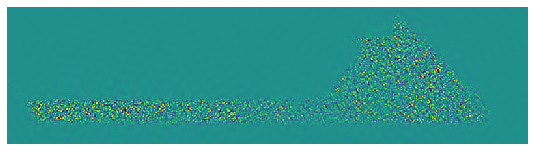

In [195]:
Klm1 = cs.utils.mulwin( Klm, mask1 )
local.show_kmap(Klm1,lonra=[145,240],latra=[-5,20],v=5e-12)